In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

# import pandas_profiling

## import 

In [38]:
%run rename_axis.ipynb

## `pandas_profiling`

In [22]:
# %time rep = pandas_profiling.ProfileReport(df)
# rep.to_file('pandas_profiling_report.html')

## Target variable

In [23]:
y.describe()

count    1.879842e+06
mean     1.267647e-01
std      1.705479e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.660313e-01
max      1.000000e+00
Name: cible1, dtype: float64

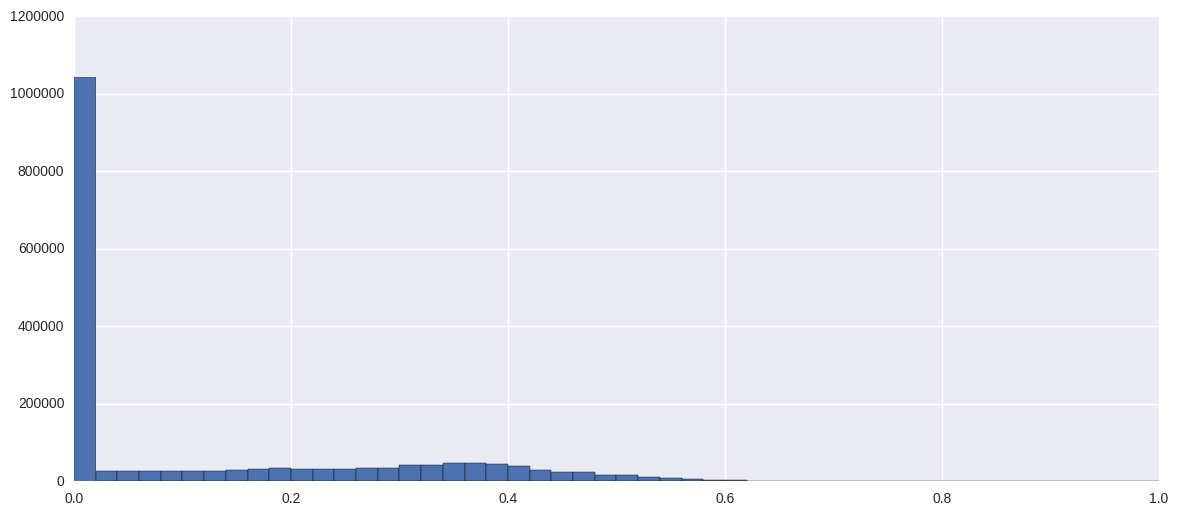

In [24]:
plt.figure(figsize = (14,6));
y.hist(bins = 50);

## Features

* `id`: ID
* `Finess`: establishment ID
* `Raison sociale`: establishment name
* `Age (deux classes >75 ans, <= 75 ans)`: age encoded into two classes (greater than 75 years and less than or equal to 75)
* `Anné`: year of hospital stay
* `Provenance des patients (département)`: department
* `Domaines d'activités`: field of activity related to the hospital stay
* `Nombre de séjours/séances MCO des patients en ALD`: number of stays / sessions corresponding to long-term ailments among MCO stays
* `Nombre total de séjours/séance`: total number of stays / sessions among MCO stays

In [25]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(2544366, 8)
Index(['est_id', 'est_name', 'department', 'field_of_activity', 'age',
       'stays_long_term', 'stays_total', 'year'],
      dtype='object')
est_id               object
est_name             object
department           object
field_of_activity    object
age                  object
stays_long_term       int64
stays_total           int64
year                  int64
dtype: object


### Categorical variables

In [26]:
cat_variables = [i for i in df.columns if df[i].dtype == 'O']
print(cat_variables)

for var in cat_variables:
    print('---------- %s --------' % var)
    print('%s unique values' % len(df[var].unique()))
    print('\n')
    print(df[var].value_counts()[:5])
    print('\n')

['est_id', 'est_name', 'department', 'field_of_activity', 'age']
---------- est_id --------
1363 unique values


750712184    29988
690781810    16282
310781406    14998
340780477    14623
330781196    14309
Name: est_id, dtype: int64


---------- est_name --------
1376 unique values


AP-HP                      29988
HOSPICES CIVILS DE LYON    16282
CHR TOULOUSE               14998
CHU MONTPELLIER            14623
CHU DE BORDEAUX            14309
Name: est_name, dtype: int64


---------- department --------
108 unique values


75-Paris             88446
Inconnu              82036
92-Hauts-de-Seine    70495
78-Yvelines          59868
94-Val-de-Marne      58814
Name: department, dtype: int64


---------- field_of_activity --------
26 unique values


D01-Digestif                                                                                258193
D02-Orthopédie traumatologie                                                                236254
D07-Cardio-vasculaire (hors cathétérismes v

### Numeric variables

In [27]:
num_variables = [i for i in df.columns if df[i].dtype == 'int64']
print(num_variables)

['stays_long_term', 'stays_total', 'year']


In [28]:
df[num_variables].describe()

,stays_long_term,stays_total,year
count,2.544366e+06,2.544366e+06,2.544366e+06
mean,2.939061e+01,7.465436e+01,2.011556e+03
std,4.594135e+02,6.359076e+02,2.306396e+00
min,0.000000e+00,1.000000e+00,2.008000e+03
25%,0.000000e+00,1.000000e+00,2.010000e+03
50%,0.000000e+00,2.000000e+00,2.012000e+03
75%,2.000000e+00,8.000000e+00,2.014000e+03
max,8.734300e+04,1.009720e+05,2.015000e+03


In [29]:
df[num_variables].corr()

,stays_long_term,stays_total,year
stays_long_term,1.000000,0.884510,0.007176
stays_total,0.884510,1.000000,0.007268
year,0.007176,0.007268,1.000000


### `stays_long_term` (Nombre de séjours/séances MCO des patients en ALD)

In [30]:
X.stays_long_term.describe()[1:]

mean       27.783746
std       434.514661
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max     80587.000000
Name: stays_long_term, dtype: float64

In [31]:
X_test.stays_long_term.describe()[1:]

mean       33.936201
std       523.447264
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max     87343.000000
Name: stays_long_term, dtype: float64

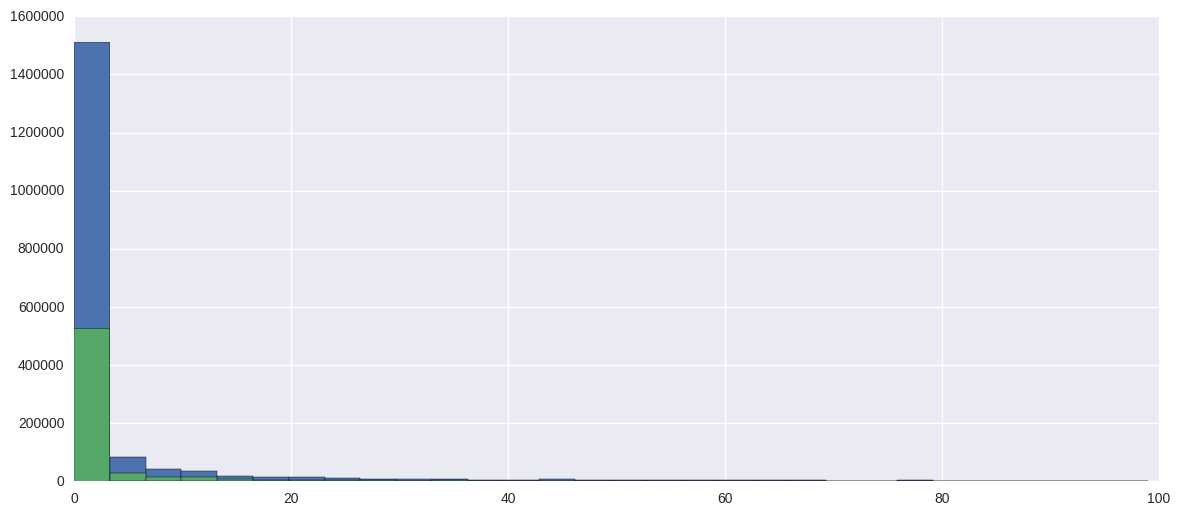

In [32]:
plt.figure(figsize=(14, 6))
X.stays_long_term[X.stays_long_term < 100].hist(bins = 30);
X_test.stays_long_term[X_test.stays_long_term < 100].hist(bins = 30);

### `stays_total` (Nombre total de séjours/séances)

In [33]:
X.stays_total.describe()[1:]

mean       72.469125
std       610.304577
min         1.000000
25%         1.000000
50%         2.000000
75%         8.000000
max     93722.000000
Name: stays_total, dtype: float64

In [34]:
X_test.stays_total.describe()[1:]

mean        80.836072
std        703.268990
min          1.000000
25%          1.000000
50%          2.000000
75%          8.000000
max     100972.000000
Name: stays_total, dtype: float64

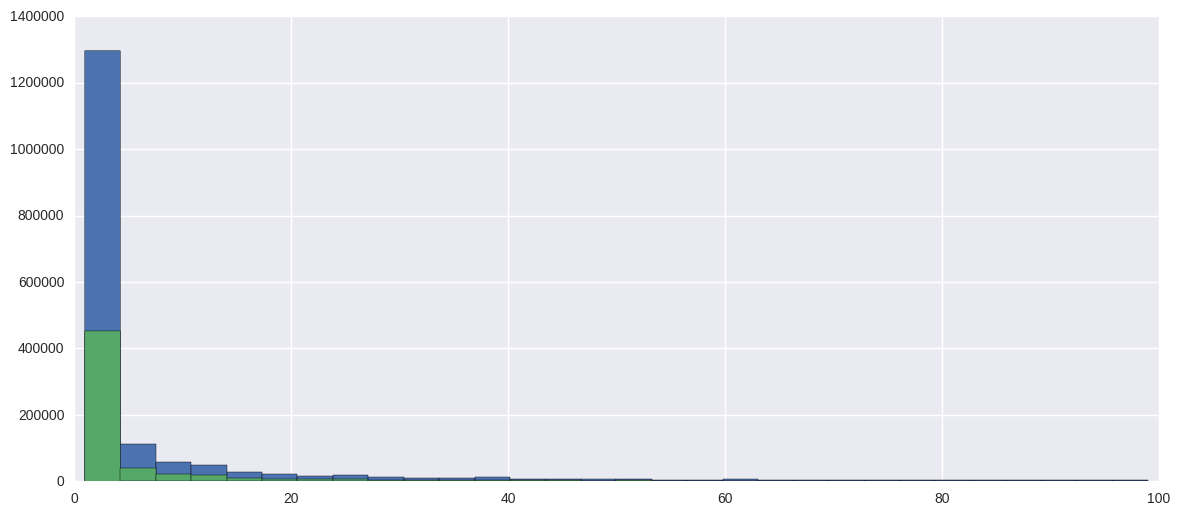

In [35]:
plt.figure(figsize=(14, 6))
X.stays_total[X.stays_total < 100].hist(bins = 30);
X_test.stays_total[X_test.stays_total < 100].hist(bins = 30);

### Correlation

In [36]:
df[['stays_total', 'stays_long_term']].corr()

,stays_total,stays_long_term
stays_total,1.00000,0.88451
stays_long_term,0.88451,1.00000


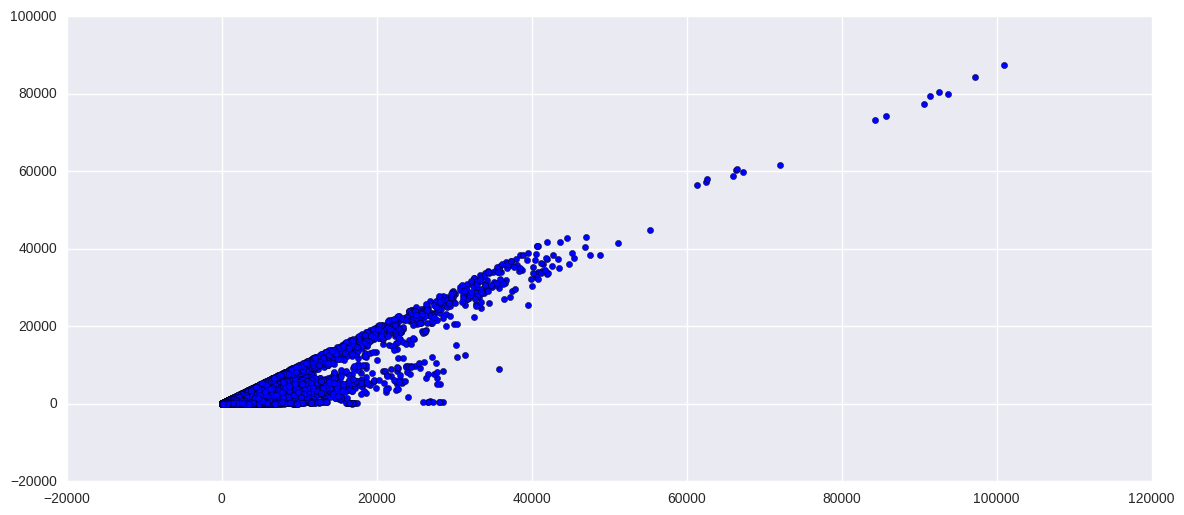

In [37]:
plt.figure(figsize=(14, 6));
plt.scatter('stays_total', 'stays_long_term', data = df);

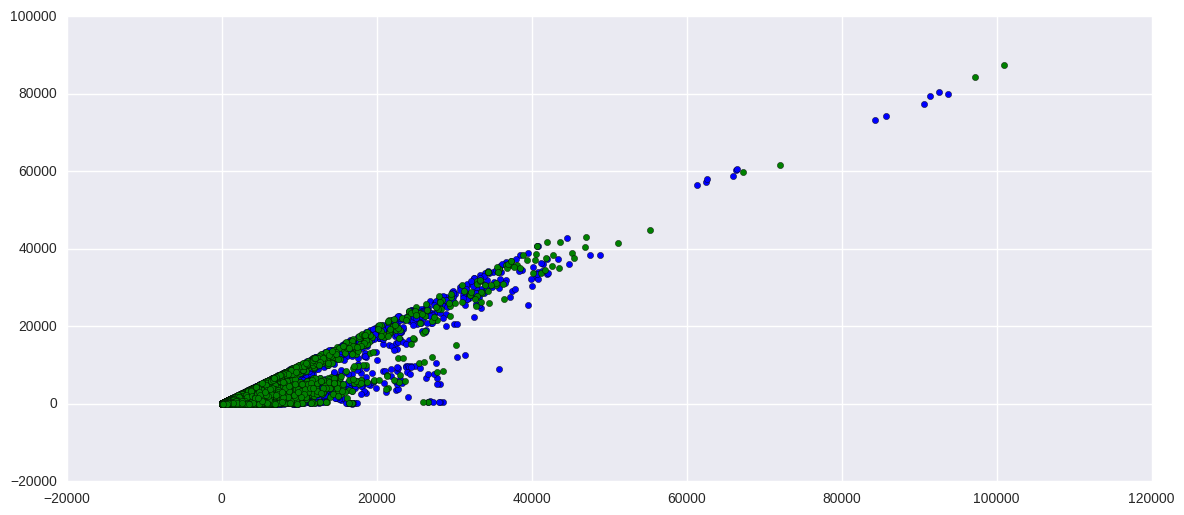

In [40]:
plt.figure(figsize=(14, 6));
plt.scatter('stays_total', 'stays_long_term', data = X);
plt.scatter('stays_total', 'stays_long_term', data = X_test, c = 'g');